In [ ]:
import numpy as np
import cv2
from numba import jit
import os
from matplotlib import pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [ ]:

def deviation_from_mean(image):
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	clahe_output = clahe.apply(image)
	print(clahe_output)
	result = clahe_output.copy()
	result = result.astype('int')
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			sub_image = clahe_output[i:i+5,j:j+5]
			mean = np.mean(sub_image)
			sub_image = sub_image - mean
			result[i:i+5,j:j+5] = sub_image
			j = j+5
		i = i+5
	return result

In [ ]:

def standard_deviation_image(image):
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	clahe_output = clahe.apply(image)
	result = clahe_output.copy()
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			sub_image = clahe_output[i:i+20,j:j+25]
			var = np.var(sub_image)
			result[i:i+20,j:j+25] = var
			j = j+25
		i = i+20
	return result

In [ ]:
def get_DistanceFromOD_data(image, centre):
	my_image = image.copy()
	x_cor = centre[0]
	y_cor = centre[1]
	feature_5 = np.reshape(image, (image.size,1))
	k = 0
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			feature_5[k] = math.fabs(x_cor-i) + math.fabs(y_cor-j)
			j = j+1
			k = k+1
		i = i+1
	return feature_5


In [ ]:

def remove_bv_image(image,bv_image):
	edge_result = image[:,:,0]				
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			if edge_result[i,j] == 255 and bv_image[i,j] == 255:
				edge_result[i,j] = 0
			j = j+1
		i = i+1
	return edge_result

In [ ]:
def count_ones(image,value):
	i = 0
	j = 0 
	k = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			if int(image[i,j]) == value:
				k = k+1
			j = j + 1			
		i = i+1
	return k

In [ ]:
def get_average_intensity(green_channel):
	average_intensity = green_channel.copy()
	i = 0
	j = 0
	while i < green_channel.shape[0]:
		j = 0
		while j < green_channel.shape[1]:
			sub_image = green_channel[i:i+20,j:j+25]
			mean = np.mean(sub_image)
			average_intensity[i:i+20,j:j+25] = mean
			j = j+25
		i = i+20
	result = np.reshape(average_intensity, (average_intensity.size,1))
	return result

In [ ]:
def get_average_hue(hue_image):
	average_hue = hue_image.copy()
	i = 0
	j = 0
	while i < hue_image.shape[0]:
		j = 0
		while j < hue_image.shape[1]:
			sub_image = hue_image[i:i+20,j:j+25]
			mean = np.mean(sub_image)
			average_hue[i:i+20,j:j+25] = mean
			j = j+25
		i = i+20
	result = np.reshape(average_hue, (average_hue.size,1))
	return result

In [ ]:
def get_average_saturation(hue_image):
	average_hue = hue_image.copy()
	i = 0
	j = 0
	while i < hue_image.shape[0]:
		j = 0
		while j < hue_image.shape[1]:
			sub_image = hue_image[i:i+20,j:j+25]
			mean = np.mean(sub_image)
			average_hue[i:i+20,j:j+25] = mean
			j = j+25
		i = i+20
	result = np.reshape(average_hue, (average_hue.size,1))
	return result

In [ ]:
def get_SD_data(sd_image):	
	feature_1 = np.reshape(sd_image, (sd_image.size,1))
	return feature_1

In [ ]:
def get_HUE_data(hue_image):	
	feature_2 = np.reshape(hue_image,(hue_image.size,1))	
	return feature_2

In [ ]:
def get_saturation_data(s_image):
	feature = np.reshape(s_image,(s_image.size,1))	
	return feature

In [ ]:
def get_INTENSITY_data(intensity_image):	
	feature_3 = np.reshape(intensity_image,(intensity_image.size,1))	
	return feature_3


In [ ]:
def get_EDGE_data(edge_candidates_image):
	feature_4 = np.reshape(edge_candidates_image,(edge_candidates_image.size,1))	
	return feature_4

In [ ]:
def get_RED_data(red_channel):	
	feature_5 = np.reshape(red_channel, (red_channel.size,1))	
	return feature_5

In [ ]:
def get_GREEN_data(green_channel):
	feature_6 = np.reshape(green_channel, (green_channel.size,1))	
	return feature_6

In [ ]:
def line_of_symmetry(image):
	image_v = image.copy()
	line = 0
	prev_diff = image_v.size
	for i in range(20,image_v.shape[0]-20):
		x1, y1 = image_v[0:i,:].nonzero()
		x2, y2 = image_v[i+1:image_v.shape[0],:].nonzero()
		diff = abs(x1.shape[0] - x2.shape[0])
		if diff < prev_diff:
			prev_diff = diff
			line = i
		i = i + 35
	return line

In [ ]:
def identify_OD(image):
	newfin = cv2.dilate(image, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=2)
	mask = np.ones(newfin.shape[:2], dtype="uint8") * 255
	y1, ycontours, yhierarchy = cv2.findContours(newfin.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	prev_contour = ycontours[0]
	for cnt in ycontours:
		if cv2.contourArea(cnt) >= cv2.contourArea(prev_contour):
			prev_contour = cnt
			cv2.drawContours(mask, [cnt], -1, 0, -1)
	M = cv2.moments(prev_contour)
	cx = int(M['m10']/M['m00'])
	cy = int(M['m01']/M['m00'])	
	return (cx,cy)

In [ ]:
def identify_OD_bv_density(blood_vessel_image):
	los = line_of_symmetry(blood_vessel_image)
	sub_image = blood_vessel_image[los-100:los+100,:]
	i = 0
	index = 0
	density = -1
	rr = 0	
	while i < sub_image.shape[1]:
		x1,y1 = sub_image[:,i:i+50].nonzero()
		count = x1.shape[0]		
		if(density < count):
			density = count
			index = i
		i = i + 30	
	print(los,index)
	return (index,los)

In [ ]:

def calculate_entropy(image):
	entropy = image.copy()
	sum = 0
	i = 0
	j = 0
	while i < entropy.shape[0]:
		j = 0
		while j < entropy.shape[1]:
			sub_image = entropy[i:i+10,j:j+10]
			histogram = cv2.calcHist([sub_image],[0],None,[256],[0,256])
			sum = 0
			for k in range(256):
				if histogram[k] != 0:					
					sum = sum + (histogram[k] * math.log(histogram[k]))
				k = k + 1
			entropy[i:i+10,j:j+10] = sum
			j = j+10
		i = i+10
	ret2,th2 = cv2.threshold(entropy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
	newfin = cv2.erode(th2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
	return newfin

In [ ]:

def edge_pixel_image(image,bv_image):
	edge_result = image.copy()
	edge_result = cv2.Canny(edge_result,30,100)	
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			if edge_result[i,j] == 255 and bv_image[i,j] == 255:
				edge_result[i,j] = 0
			j = j+1
		i = i+1
	newfin = cv2.dilate(edge_result, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
	return newfin

In [ ]:
def extract_bv(image):
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	contrast_enhanced_green_fundus = clahe.apply(image)
	# applying alternate sequential filtering (3 times closing opening)
	r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
	R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
	r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
	R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
	r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
	R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
	f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
	f5 = clahe.apply(f4)

	# removing very small contours through area parameter noise removal
	ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
	mask = np.ones(f5.shape[:2], dtype="uint8") * 255
	contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
	for cnt in contours:
		if cv2.contourArea(cnt) <= 200:
			cv2.drawContours(mask, [cnt], -1, 0, -1)			
	im = cv2.bitwise_and(f5, f5, mask=mask)
	ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)			
	newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	

	# removing blobs of microaneurysm & unwanted bigger chunks taking in consideration they are not straight lines like blood
	# vessels and also in an interval of area
	fundus_eroded = cv2.bitwise_not(newfin)
	xmask = np.ones(image.shape[:2], dtype="uint8") * 255
	xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
	for cnt in xcontours:
		shape = "unidentified"
		peri = cv2.arcLength(cnt, True)
		approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
		if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
			shape = "circle"	
		else:
			shape = "veins"
		if(shape=="circle"):
			cv2.drawContours(xmask, [cnt], -1, 0, -1)	
	
	finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
	blood_vessels = cv2.bitwise_not(finimage)
	dilated = cv2.erode(blood_vessels, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations=1)
	dilated1 = cv2.dilate(blood_vessels, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
	blood_vessels_1 = cv2.bitwise_not(dilated)
	return blood_vessels_1

In [ ]:
def standard_deviation_image(image):
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	clahe_output = clahe.apply(image)
	result = clahe_output.copy()
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			sub_image = clahe_output[i:i+20,j:j+25]
			var = np.var(sub_image)
			result[i:i+20,j:j+25] = var
			j = j+25
		i = i+20
	return result


In [ ]:
pathFolder = "/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/test_images/f506b2b3c950.png"

In [ ]:
OD_data = np.genfromtxt('OD_info.txt', delimiter=',', dtype=None, names=('name','x-coordinate','y-coordinate'))
coordinates = []
name = []	
counterd = 0

for t in OD_data:		
	coordinates.append((t[1],t[2]))
	name.append(t[0].decode("utf-8"))
	counterd = counterd + 1
		
	for file_name in filesArray:		
		file_name_no_extension = os.path.splitext(file_name)[0]
		coordinates_OD = coordinates[name.index(file_name_no_extension+"_resized")]

OSError: ignored

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


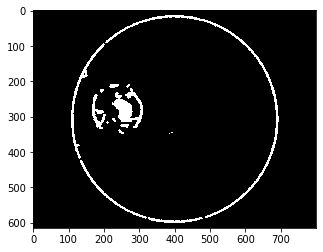

In [ ]:
fundus1 = cv2.imread(pathFolder)
fundus = cv2.resize(fundus1,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


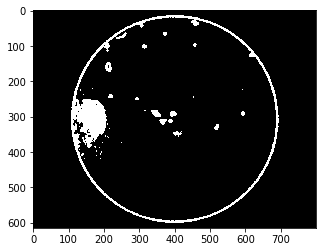

In [ ]:
fundus1 = cv2.imread(pathFolder)
fundus = cv2.resize(fundus1,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1 

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


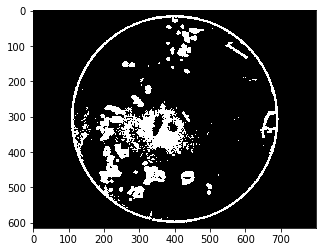

In [ ]:
fundus1 = cv2.imread(pathFolder)
fundus = cv2.resize(fundus1,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

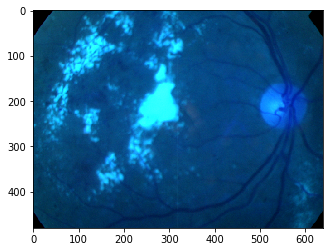

In [ ]:
plt.imshow(fundus1)

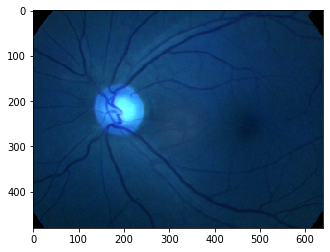

In [ ]:
plt.imshow(fundus1)

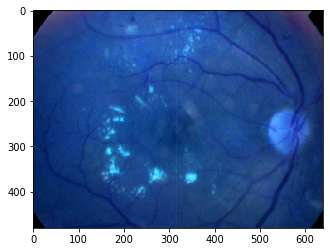

In [ ]:
plt.imshow(fundus1)

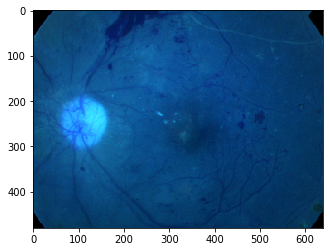

In [ ]:
plt.imshow(fundus1)

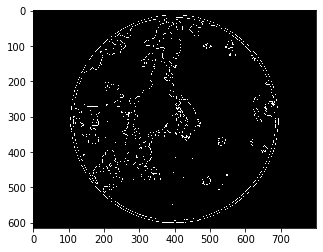

In [ ]:
edges = cv2.Canny(final_candidates,20,10)

plt.imshow(edges,cmap = 'gray')


plt.show()

In [ ]:
kernel = np.ones((5,5), np.uint8) 
  
eye_final = cv2.dilate(edges, kernel, iterations=2) 
eye_final = cv2.erode(eye_final, kernel, iterations=1) 
eye_final = cv2.dilate(eye_final, kernel, iterations=4)
eye_final = cv2.erode(eye_final, kernel, iterations=3)

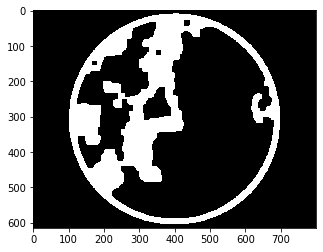

In [ ]:
plt.imshow(eye_final,cmap='gray')

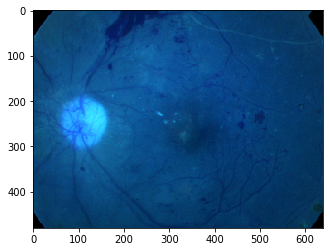

In [ ]:
plt.imshow(fundus1)

In [ ]:
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/test1.png",eye_final)

True

In [ ]:
img = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/test.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

white_px = np.asarray([255, 255, 255])
black_px = np.asarray([0, 0, 0])

(row, col) = thresh.shape
img_array = np.array(img)

for r in range(row):
    for c in range(col):
        px = thresh[r][c]
        if all(px == white_px):
            img_array[r][c] = black_px

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erosion = cv2.erode(img_array, kernel, iterations = 1)

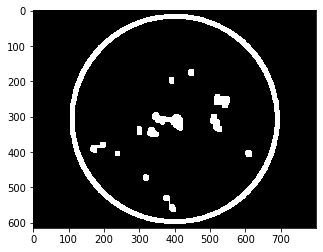

In [ ]:
plt.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pathFolder = "/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/train_images/0125fbd2e791.png"

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


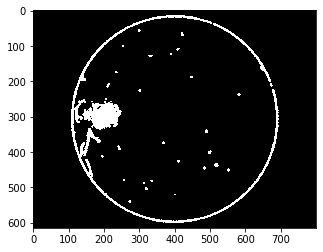

In [ ]:
fundus1 = cv2.imread(pathFolder)
fundus = cv2.resize(fundus1,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

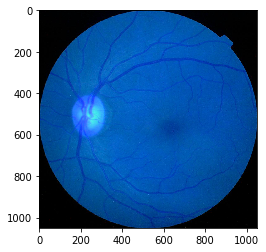

In [ ]:
plt.imshow(fundus1)

In [ ]:
def extract_bv(image):
  b,green_fundus,r = cv2.split(image)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  contrast_enhanced_green_fundus = clahe.apply(green_fundus)
  # applying alternate sequential filtering (3 times closing opening)
  r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
  R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
  r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
  R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
  r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
  R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
  f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
  f5 = clahe.apply(f4)

  # removing very small contours through area parameter noise removal
  ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
  mask = np.ones(f5.shape[:2], dtype="uint8") * 255
  im2, contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    if cv2.contourArea(cnt) <= 200:
      cv2.drawContours(mask, [cnt], -1, 0, -1)			
  im = cv2.bitwise_and(f5, f5, mask=mask)
  ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)			
  newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	

  # removing blobs of microaneurysm & unwanted bigger chunks taking in consideration they are not straight lines like blood
  # vessels and also in an interval of area
  fundus_eroded = cv2.bitwise_not(newfin)
  xmask = np.ones(image.shape[:2], dtype="uint8") * 255
  x1, xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
  for cnt in xcontours:
    shape = "unidentified"
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
    if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
      shape = "circle"	
    else:
      shape = "veins"
    if(shape=="circle"):
      cv2.drawContours(xmask, [cnt], -1, 0, -1)	
	
  finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
  blood_vessels = cv2.bitwise_not(finimage)
  dilated = cv2.erode(blood_vessels, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations=1)
  #dilated1 = cv2.dilate(blood_vessels, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
  blood_vessels_1 = cv2.bitwise_not(dilated)
  return blood_vessels_1

In [ ]:
import cv2
import os
import csv
 
# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not

refPt = []
cropping = False

def click_and_crop(event, x, y, flags, param):
	# grab references to the global variables
	global refPt, cropping
 
	# if the left mouse button was clicked, record the starting
	# (x, y) coordinates and indicate that cropping is being
	# performed
	if event == cv2.EVENT_LBUTTONDOWN:
		refPt.append((x, y))

In [ ]:
def remove_bv_image(image,bv_image):
	edge_result = image[:,:,0]				
	i = 0
	j = 0
	while i < image.shape[0]:
		j = 0
		while j < image.shape[1]:
			if edge_result[i,j] == 255 and bv_image[i,j] == 255:
				edge_result[i,j] = 0
			j = j+1
		i = i+1
	return edge_result

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


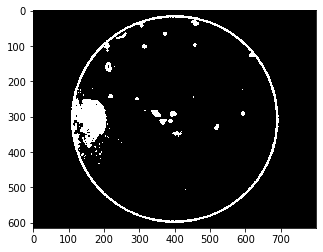

In [ ]:
fundus1 = cv2.imread(pathFolder)
fundus = cv2.resize(fundus1,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
cl_res_dev=cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp")
cl_res_dev = remove_bv_image(cl_res_dev,bv_image_dash)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

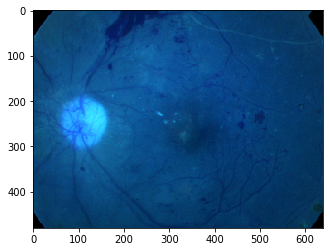

In [ ]:
plt.imshow(fundus1)

In [ ]:
def pro_process(temp_img,input_size):
    img = np.asarray(temp_img).astype('float32')
    img = scipy.misc.imresize(img, (input_size, input_size, 3))
    return img

def BW_img(input,thresholding):
    if input.max() > thresholding:
        binary = input > thresholding
    else:
        binary = input > input.max()/2.0
        
    label_image = label(binary)
    regions = regionprops(label_image)
    area_list = []
    for region in regions:
        area_list.append(region.area)
    if area_list:
        idx_max = np.argmax(area_list)
        binary[label_image != idx_max+1] = 0
    return scipy.ndimage.binary_fill_holes(np.asarray(binary).astype(int))

def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef2(y_true, y_pred):
    score0 = dice_coef(y_true[:, :, :, 0], y_pred[:, :, :, 0])
    score1 = dice_coef(y_true[:, :, :, 1], y_pred[:, :, :, 1])
    score = 0.5 * score0 + 0.5 * score1
    
    return score

def dice_coef_loss(y_true, y_pred):
    return -dice_coef2(y_true, y_pred)

def disc_crop(org_img, DiscROI_size, C_x, C_y):
    tmp_size = int(DiscROI_size/2);
    if len(org_img.shape)==2:
        disc_region = np.zeros((DiscROI_size, DiscROI_size), dtype= org_img.dtype)
    else:
        disc_region = np.zeros((DiscROI_size, DiscROI_size,3), dtype= org_img.dtype)       
        
    crop_coord = np.array([C_x-tmp_size, C_x+tmp_size, C_y-tmp_size, C_y+tmp_size], dtype= int)
    err_coord = [0, DiscROI_size, 0, DiscROI_size]

    if crop_coord[0] < 0:
        err_coord[0] = abs(crop_coord[0]) 
        crop_coord[0] = 0
        
    if crop_coord[2] < 0:
        err_coord[2] = abs(crop_coord[2]) 
        crop_coord[2] = 0
        
    if crop_coord[1] > org_img.shape[0]:
        err_coord[1] = err_coord[1] - (crop_coord[1] - org_img.shape[0]) 
        crop_coord[1] = org_img.shape[0]
        
    if crop_coord[3] > org_img.shape[1]:
        err_coord[3] = err_coord[3] - (crop_coord[3] - org_img.shape[1]) 
        crop_coord[3] = org_img.shape[1]
    if len(org_img.shape)==2:    
        disc_region[err_coord[0]:err_coord[1], err_coord[2]:err_coord[3] ] = org_img[crop_coord[0]:crop_coord[1], crop_coord[2]:crop_coord[3]]
    else:
        disc_region[err_coord[0]:err_coord[1], err_coord[2]:err_coord[3], ] = org_img[crop_coord[0]:crop_coord[1], crop_coord[2]:crop_coord[3], ]

    return disc_region, err_coord, crop_coord

In [ ]:

import numpy as np
#import scipy.io as sio
import scipy.misc
from keras.preprocessing import image
from skimage.transform import rotate, resize
from skimage.measure import label, regionprops
from time import time
# from utils_Mnet import pro_process, BW_img, disc_crop
import matplotlib.pyplot as plt
from skimage.io import imsave


import cv2
import os

# import Model_DiscSeg as DiscModel
# import Model_MNet as MNetModel

Using TensorFlow backend.


In [ ]:
from keras.models import load_model
Model_DiscSeg=load_model('/content/drive/My Drive/Model_DiscSeg_ORIGA_pretrain.h5')

In [ ]:
def cdr(cup,disc,plot):
    
    #morphological closing and opening operations
    R1 = cv2.morphologyEx(cup, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 1)	
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(43,43)), iterations = 1)

    img = clahe.apply(r3)
    
    
    ret,thresh = cv2.threshold(cup,127,255,0)
    img,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #Getting all possible contours in the segmented image
    cup_diameter = 0
    largest_area = 0
    el_cup = contours[0]
    if len(contours) != 0:
        for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) #Getting the contour with the largest area
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_cup = cv2.fitEllipse(contours[i])
                
    cv2.ellipse(img,el_cup,(140,60,150),3)  #fitting ellipse with the largest area
    x,y,w,h = cv2.boundingRect(contours[index]) #fitting a rectangle on the ellipse to get the length of major axis
    cup_diameter = max(w,h) #major axis is the diameter

    #morphological closing and opening operations
    R1 = cv2.morphologyEx(disc, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)), iterations = 1)
    r1 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)), iterations = 1)
    R2 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,21)), iterations = 1)
    r2 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,1)), iterations = 1)
    R3 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33)), iterations = 1)
    r3 = cv2.morphologyEx(R3, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(43,43)), iterations = 1)

    img2 = clahe.apply(r3)
    
    ret,thresh = cv2.threshold(disc,127,255,0)
    img2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #Getting all possible contours in the segmented image
    disk_diameter = 0
    largest_area = 0
    el_disc = el_cup
    if len(contours) != 0:
          for i in range(len(contours)):
            if len(contours[i]) >= 5:
                area = cv2.contourArea(contours[i]) #Getting the contour with the largest area
                if (area>largest_area):
                    largest_area=area
                    index = i
                    el_disc = cv2.fitEllipse(contours[i])
                    
    cv2.ellipse(img2,el_disc,(140,60,150),3) #fitting ellipse with the largest area
    x,y,w,h = cv2.boundingRect(contours[index]) #fitting a rectangle on the ellipse to get the length of major axis
    disk_diameter = max(w,h) #major axis is the diameter
                
    if plot:
        plt.imshow(img2, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Disk")
        plt.show()
        plt.imshow(img)
        plt.axis("off")
        plt.title("Optic Cup")
        plt.show()
        
    if(disk_diameter == 0): return 1 # if disc not segmented properly then cdr might be infinity
    cdr = cup_diameter/disk_diameter #ration of major axis of cup and disc
    return cdr

In [ ]:
    cup = cv2.imread('E:/Term Project 01/cup.png',0) #images will be saved in the same folder as the code so that folder needs to be put here
    disc = cv2.imread('E:/Term Project 01/disk.png',0) #images will be saved in the same folder as the code so that folder needs to be put here
    cdr_cal = cdr(cup,disc,False)

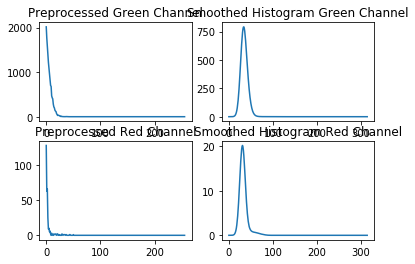

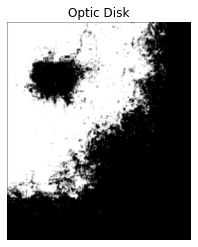

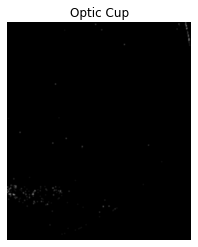

In [ ]:
segment(fundus1,True,True)

In [ ]:
from scipy import signal
import cv2
import sys
import glob
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import os
from PIL import Image
import xlrd 
import math
from pylab import*
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))

In [ ]:
def segment(image,plot_seg,plot_hist):

    # image = image[400:1400,500:1600,:] #cropping the fundus image to ger region of interest

    Abo,Ago,Aro = cv2.split(image)  #splitting into 3 channels
    #Aro = clahe.apply(Aro)
    Ago = clahe.apply(Ago)
    M = 60    #filter size
    filter = signal.gaussian(M, std=6) #Gaussian Window
    filter=filter/sum(filter)
    STDf = filter.std()  #It'standard deviation
    

    Ar = Aro - Aro.mean() - Aro.std() #Preprocessing Red
    
    Mr = Ar.mean()                           #Mean of preprocessed red
    SDr = Ar.std()                           #SD of preprocessed red
    Thr = 1.2*M - STDf - Ar.std()            #Optic disc Threshold
    #print(Thr)

    Ag = Ago - Ago.mean() - Ago.std()		 #Preprocessing Green
    Mg = Ag.mean()                           #Mean of preprocessed green
    SDg = Ag.std()                           #SD of preprocessed green
    Thg = 0.5*Mg +2*STDf + 2*SDg + Mg        #Optic Cup Threshold
    #print(Thg)
    
    
    hist,bins = np.histogram(Ag.ravel(),256,[0,256])   #Histogram of preprocessed green channel
    histr,binsr = np.histogram(Ar.ravel(),256,[0,256]) #Histogram of preprocessed red channel


    smooth_hist_g=np.convolve(filter,hist)  #Histogram Smoothing Green
    smooth_hist_r=np.convolve(filter,histr) #Histogram Smoothing Red
    
    #plot histogram if input is true
    if plot_hist:
        plt.subplot(2, 2, 1)
        plt.plot(hist)
        plt.title("Preprocessed Green Channel")

        plt.subplot(2, 2, 2)
        plt.plot(smooth_hist_g)
        plt.title("Smoothed Histogram Green Channel")

        plt.subplot(2, 2, 3)
        plt.plot(histr)
        plt.title("Preprocessed Red Channel")

        plt.subplot(2, 2, 4)
        plt.plot(smooth_hist_r)
        plt.title("Smoothed Histogram Red Channel")

        plt.show()
    
    r,c = Ag.shape
    Dd = np.zeros(shape=(r,c)) #Segmented disc image initialization
    Dc = np.zeros(shape=(r,c)) #Segmented cup image initialization

    #Using obtained threshold for thresholding of the fundus image
    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                Dd[i,j]=255
            else:
                Dd[i,j]=0

    for i in range(1,r):
        for j in range(1,c):
        
            if Ag[i,j]>Thg:
                Dc[i,j]=1
            else:
                Dc[i,j]=0
         
    #Saving the segmented image in the same place as the code folder      
    cv2.imwrite("/content/drive/MyDrive/disk.png",Dd)
    # plt.imsave('cup.png',Dc)
    
    if plot_seg:
        plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Disk")
        plt.show()
        
        plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
        plt.axis("off")
        plt.title("Optic Cup")
        plt.show()


In [ ]:
image = cv2.imread(pathFolder)

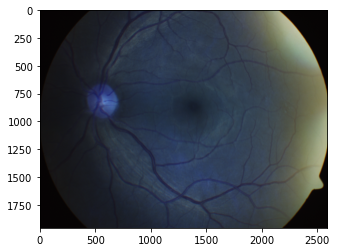

In [ ]:
fundus1=cv2.imread(pathFolder)
plt.imshow(fundus1)

In [ ]:
im = image[193:393,40:240] 

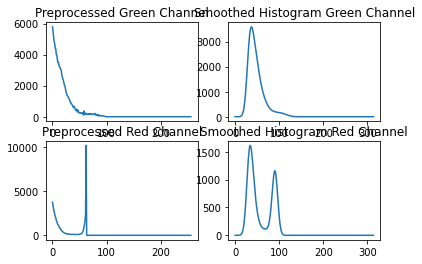

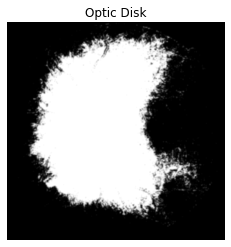

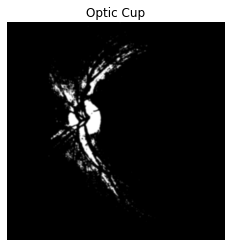

In [ ]:
segment(image,True,True)

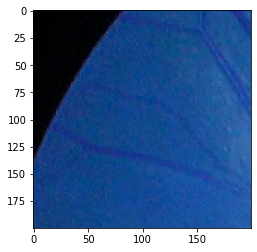

In [ ]:
plt.imshow(im)

In [ ]:
pathFolder = "/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/train_images/ff4cd992667b.png"

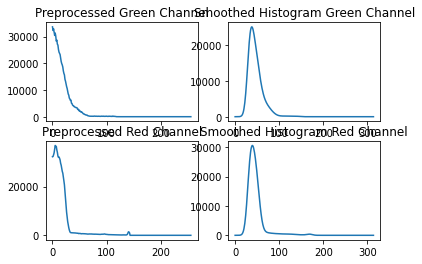

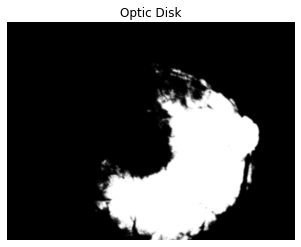

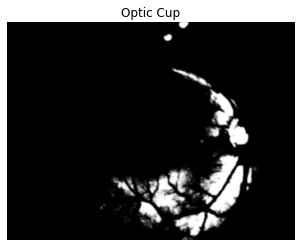

In [ ]:
segment(image,True,True)

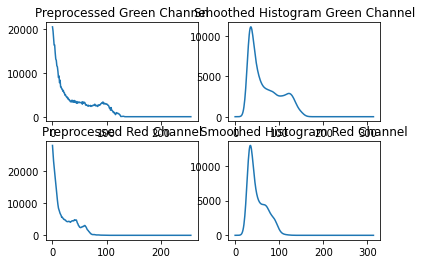

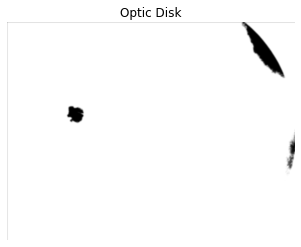

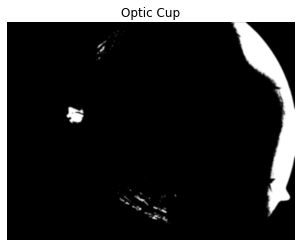

In [ ]:
segment(image,True,True)

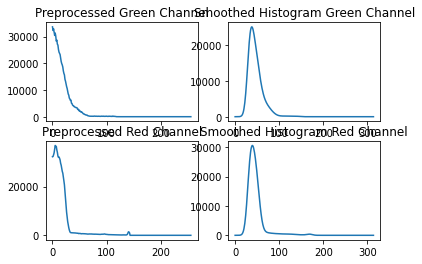

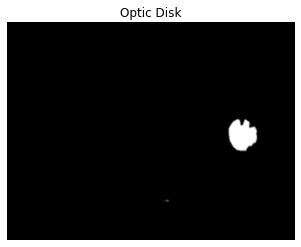

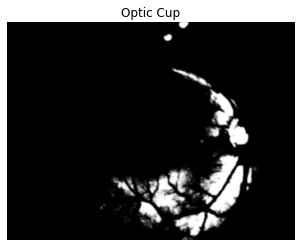

In [ ]:
segment(image,True,True)

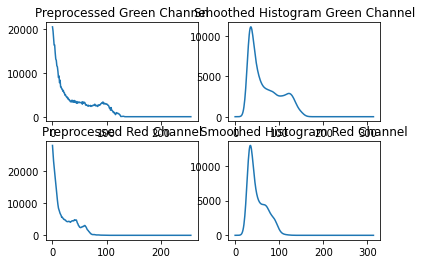

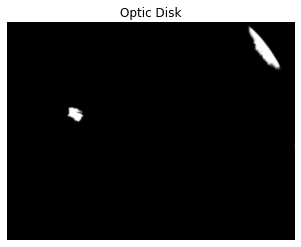

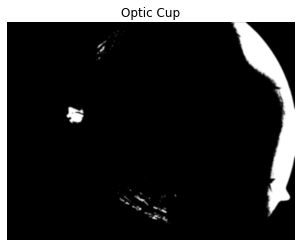

In [ ]:
segment(image,True,True)

In [ ]:
segment(image,True,True)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/lena.png",Dd)

In [ ]:
mask = cv2.imread("/content/drive/MyDrive/disk.png")
img = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/train_images/ff4cd992667b.png")
res = cv2.bitwise_and(img,img,mask = Dd)

In [ ]:
plt.imshow(Dd)
plt.imshow(img)
plt.imshow(mask)

In [ ]:
plt.imshow(mask)

In [ ]:
img = cv2.imread("/content/drive/My Drive/ffa73465b705.png")

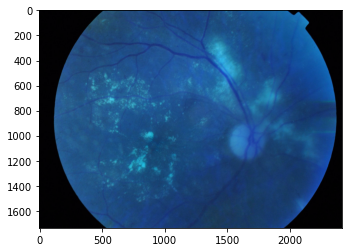

In [ ]:
plt.imshow(img)

In [ ]:
print(img)

[[[2 1 3]
  [2 1 3]
  [2 1 3]
  ...
  [1 0 2]
  [1 0 2]
  [1 0 2]]

 [[2 1 3]
  [2 1 3]
  [2 1 3]
  ...
  [1 0 2]
  [1 0 2]
  [1 0 2]]

 [[2 1 3]
  [2 1 3]
  [2 1 3]
  ...
  [1 0 2]
  [1 0 2]
  [1 0 2]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]]


In [ ]:
Abo,Ago,Aro = cv2.split(img)  #splitting into 3 channels
#Aro = clahe.apply(Aro)
Ago = clahe.apply(Ago)


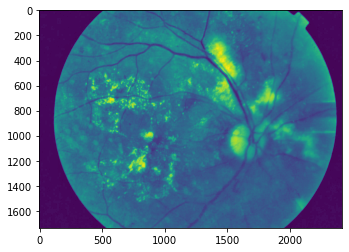

In [ ]:
plt.imshow(Ago)

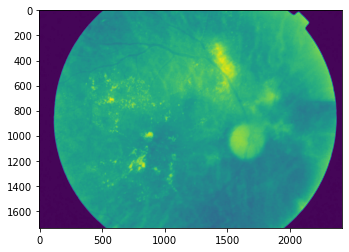

In [ ]:
plt.imshow(Aro)

In [ ]:
    M = 60    #filter size
    filter = signal.gaussian(M, std=6) #Gaussian Window
    filter=filter/sum(filter)
    STDf = filter.std()  #It'standard deviation
    

    Ar = Aro - Aro.mean() - Aro.std() #Preprocessing Red
    
    Mr = Ar.mean()                           #Mean of preprocessed red
    SDr = Ar.std()                           #SD of preprocessed red
    Thr = 1.8*M - STDf - Ar.std()            #Optic disc Threshold
    #print(Thr)

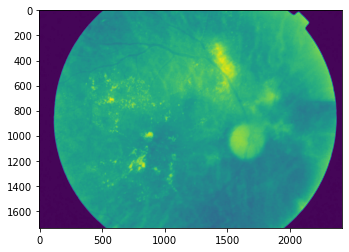

In [ ]:
plt.imshow(Ar)

In [ ]:
print(Thr)

54.40041020182158


In [ ]:
    r,c = Ar.shape
    Dd = np.zeros(shape=(r,c)) #Segmented disc image initialization
    Dc = np.zeros(shape=(r,c)) #Segmented cup image initialization

    #Using obtained threshold for thresholding of the fundus image
    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                img[i,j]= [0,0,0]
            else:
              img[i,j]=img[i,j]
           

In [ ]:
print(img[500,500])

[ 35  84 132]


In [ ]:
print(Ar[500,4000])

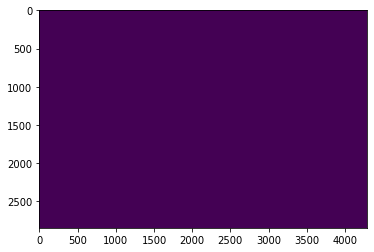

In [ ]:
plt.imshow(Dd, interpolation = 'bicubic')

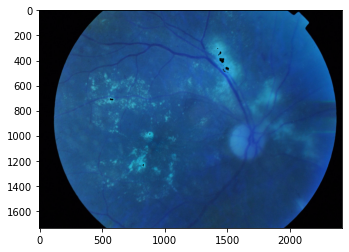

In [ ]:
plt.imshow(img)

In [ ]:
print(Ar)

[[-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]
 [-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]
 [-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]
 ...
 [-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]
 [-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]
 [-190.82786275 -190.82786275 -190.82786275 ... -190.82786275
  -190.82786275 -190.82786275]]


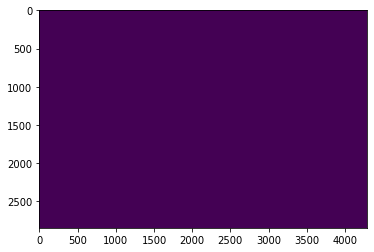

In [ ]:
plt.imshow(Dd)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(800, 615) SHAPE OF FINAL CANDIDATE


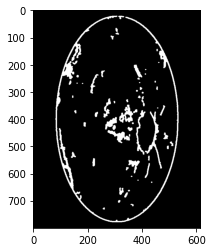

In [ ]:
fundus = cv2.resize(np.uint8(img),(615,800))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(np.uint8(fundus_mask),(615,800))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
plt.imshow(edge_candidates)
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
plt.imshow(edge_candidates, cmap='gray')
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

In [ ]:
n_white_pix = np.sum(final_candidates == 255)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 48218


[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


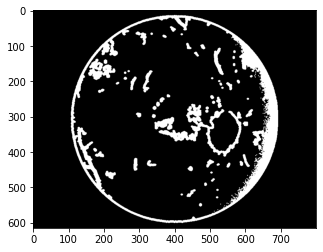

In [ ]:

fundus = cv2.resize(img,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)

In [ ]:
img=extract_ex(img)

In [ ]:
plt.imshow(final_candidates)

In [ ]:
img = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/train_images/ff4cd992667b.png")

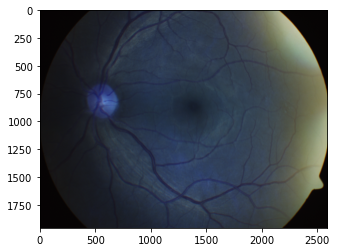

In [ ]:
plt.imshow(img)

In [ ]:
print(img)

[[[4 2 2]
  [6 4 4]
  [6 4 4]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[6 4 4]
  [6 4 4]
  [7 5 5]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[6 4 4]
  [6 4 4]
  [6 4 4]
  ...
  [7 5 5]
  [7 5 5]
  [7 5 5]]

 ...

 [[6 4 4]
  [6 3 5]
  [6 3 5]
  ...
  [7 5 5]
  [7 5 5]
  [7 5 5]]

 [[6 4 4]
  [6 3 5]
  [6 3 5]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[5 3 2]
  [6 3 5]
  [6 2 7]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]]


In [ ]:
Abo,Ago,Aro = cv2.split(img)  #splitting into 3 channels
#Aro = clahe.apply(Aro)
Ago = clahe.apply(Ago)


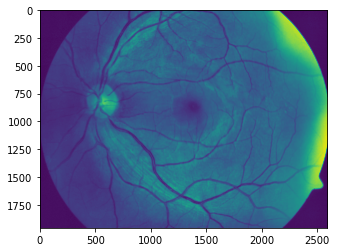

In [ ]:
plt.imshow(Ago)

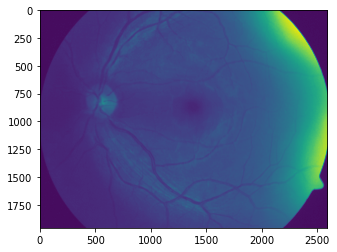

In [ ]:
plt.imshow(Abo)

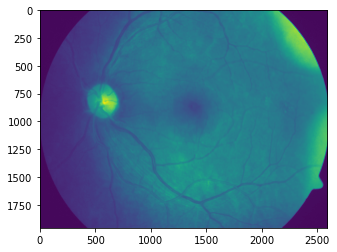

In [ ]:
plt.imshow(Aro)

In [ ]:
    M = 90    #filter size
    filter = signal.gaussian(M, std=6) #Gaussian Window
    filter=filter/sum(filter)
    STDf = filter.std()  #It'standard devieation
    

    Ar = Aro - Aro.mean() - Aro.std() #Preprocessing Red
    
    Mr = Ar.mean()                           #Mean of preprocessed red
    SDr = Ar.std()                           #SD of preprocessed red
    Thr = 1*M - STDf - Ar.std()            #Optic disc Threshold
    #print(Thr)

In [ ]:
    r,c = Ar.shape
    Dd = np.zeros(shape=(r,c)) #Segmented disc image initialization
    Dc = np.zeros(shape=(r,c)) #Segmented cup image initialization

    #Using obtained threshold for thresholding of the fundus image
    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                img[i,j]= [0,0,0]
            else:
                img[i,j]=img[i,j]

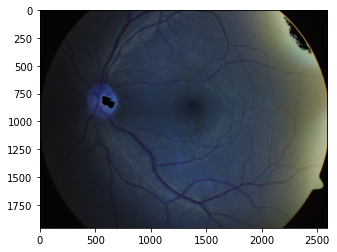

In [ ]:
plt.imshow(img)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


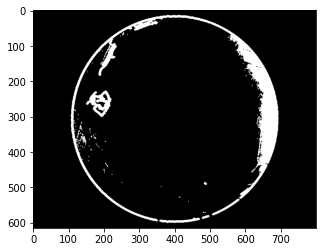

In [ ]:
fundus = cv2.resize(img,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(final_candidates,cmap='gray')	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)
  

In [ ]:
n_white_pix = np.sum(final_candidates == 255)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 31065


[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
(492000, 1) deviation data shape
(615, 800) SHAPE OF FINAL CANDIDATE


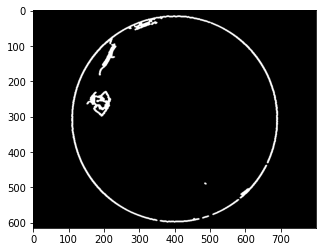

In [ ]:
fundus = cv2.resize(img,(800,615))		
fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")
fundus_mask = cv2.resize(fundus_mask,(800,615))
f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
fundus_dash = cv2.merge((f1,f2,f3))

b,g,r = cv2.split(fundus_dash)		
hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_fundus)		
gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_fundus = clahe.apply(gray_scale)		
contrast_enhanced_green_fundus = clahe.apply(g)
plt.imshow(contrast_enhanced_green_fundus)

average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
average_hue = get_average_hue(h)/255
average_saturation = get_average_saturation(s)/255	

bv_image_dash = extract_bv(g)
bv_image = extract_bv(gray_scale)



var_fundus = standard_deviation_image(contrast_enhanced_fundus)
edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
edge_candidates = np.uint8(edge_candidates)	
plt.imshow(edge_candidates)
															
		# label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
deviation_matrix = deviation_from_mean(gray_scale)

feature1 = get_SD_data(var_fundus)/255
feature2 = get_HUE_data(h)/255
feature3 = get_saturation_data(s)/255
feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
feature5 = get_RED_data(r)/255
feature6 = get_GREEN_data(g)/255
feature8 = get_HUE_data(deviation_matrix)/255
print(feature8.shape,"deviation data shape")


Z = np.hstack((feature2,feature3))	#HUE and SATURATION
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
		
center_t = [(t[0]*255,t[1]*255) for t in center]		
ex_color = (40,230)

distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
index1 = distance.index((min(distance)))
if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index1 = -1		

distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
index2 = -1		
if min(distance2)[0] <=25:
    index2 = distance2.index((min(distance2)))		
if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
    index2 = -1

green = [0,255,0]
blue = [255,0,0]
red = [0,0,255]
white = [255,255,255]
black = [0,0,0]
pink = [220,30,210]
sky = [30,240,230]
yellow = [230,230,30]

color = [white,black,red,green,blue,pink]
color = np.array(color,np.uint8)
label = np.reshape(label, gray_scale.shape)

plt.imshow(label)


test = label.copy()		
if index1 == -1:
    test.fill(0)
else:
    test[test!=distance.index((min(distance)))] = -1
    test[test==distance.index((min(distance)))] = 255
    test[test==-1] = 0

test2 = label.copy()
if index2 == -1:
		test2.fill(0)
else:
		test2[test2!=index2] = -1
		test2[test2==index2] = 255
		test2[test2==-1] = 0
	

y = color[label]
y = np.uint8(y)

res_from_clustering = np.bitwise_or(test2,test)

# file_name_no_extension = os.path.splitext(file_name)[0]
		
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
plt.imshow(final_candidates)
OD_loc = gray_scale.copy()
# cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
# cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
# print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
# final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
plt.imshow(final_candidates)
				
# cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
maskk = cv2.imread("MASK.bmp")
# final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
		
final_candidates = final_candidates.astype('uint8')
final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
plt.imshow(edge_candidates,cmap='gray')	
# cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
		
candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")		
		
# b,gg,r = cv2.split(label_image)
# label = np.reshape(gg,(gg.size,1))/255
# co3 = count_ones(edge_candidates,255)
# no_of_white = count_ones(label,1)
# print(no_of_white,"no of white pixels")
# print(co3,"check me")




# temp = 0
# counter = 0
# this_image_rows = 0
# 		with open('training.csv', 'a') as csvfile:
# 			filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# 			while counter < feature1.shape[0]:
# 				if candidates_vector[counter,0] == 1:
# 					qq = qq + 1
# 					temp = counter
# 					this_image_rows = this_image_rows+1
# 					filewriter.writerow([feature2[counter,0],feature3[counter,0],feature4[counter,0],feature5[counter,0],feature6[counter,0],feature7[counter,0],feature8[counter,0],average_intensity[counter,0],average_hue[counter,0],average_saturation[counter,0],int(label[counter,0])])
# 				counter = counter + 1
						
# 		print("no of rows addded : ", this_image_rows)
  

In [ ]:
def disp(image):
        # image = cv2.resize(np.float32(image), (4800, 4800))
        bloodvessel = extract_ex(image)
#         imag = rgb2gray(bloodvessel)
        # plt.imshow(bloodvessel,cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        n_white_pix = np.sum(bloodvessel == 255)
        print(n_white_pix)
        # print('Number of white pixels:', n_white_pix)
        return n_white_pix

In [ ]:
def optic(image):
    Abo,Ago,Aro = cv2.split(image)
	
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
    Ago = clahe.apply(Ago)
    M = 60    #filter size
    filter = signal.gaussian(M, std=6) #Gaussian Window
    filter=filter/sum(filter)
    STDf = filter.std()  #It'standard deviation
    Ar = Aro - Aro.mean() - Aro.std() #Preprocessing Red
    Mr = Ar.mean()                           #Mean of preprocessed red
    SDr = Ar.std()                           #SD of preprocessed red
    Thr = 1.8*M - STDf - Ar.std() 
    print(Thr) 
    Ag = Ago - Ago.mean() - Ago.std()   
    r,c = Ag.shape
    Dd = np.zeros(shape=(r,c)) #Segmented disc image initialization
    Dc = np.zeros(shape=(r,c)) #Segmented cup image initialization

    #Using obtained threshold for thresholding of the fundus image
    for i in range(1,r):
        for j in range(1,c):
            if Ar[i,j]>Thr:
                image[i,j]= [0,0,0]
            else:
                image[i,j]=image[i,j]
    return image

In [ ]:
def extract_ex(img):
  fundus = cv2.resize(img,(2000,3000))
  print(fundus)
  fundus=optic(fundus)	
  print(fundus)	
  fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")

  print(fundus_mask)
  fundus_mask = cv2.resize(fundus_mask,(2000,3000))
  f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
  f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
  f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
  fundus_dash = cv2.merge((f1,f2,f3))
  b,g,r = cv2.split(fundus_dash)		
  hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv_fundus)		
  gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  contrast_enhanced_fundus = clahe.apply(gray_scale)		
  contrast_enhanced_green_fundus = clahe.apply(g)
  plt.imshow(contrast_enhanced_green_fundus)
  average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
  average_hue = get_average_hue(h)/255
  average_saturation = get_average_saturation(s)/255	
  bv_image_dash = extract_bv(g)
  bv_image = extract_bv(gray_scale)
  var_fundus = standard_deviation_image(contrast_enhanced_fundus)
  edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
  newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
  edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
  edge_candidates = np.uint8(edge_candidates)	
  plt.imshow(edge_candidates)
                                
      # label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
  deviation_matrix = deviation_from_mean(gray_scale)

  feature1 = get_SD_data(var_fundus)/255
  feature2 = get_HUE_data(h)/255
  feature3 = get_saturation_data(s)/255
  feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
  feature5 = get_RED_data(r)/255
  feature6 = get_GREEN_data(g)/255
  feature8 = get_HUE_data(deviation_matrix)/255
  print(feature8.shape,"deviation data shape")


  Z = np.hstack((feature2,feature3))	#HUE and SATURATION
  Z = np.float32(Z)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
  ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

  u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
      
  center_t = [(t[0]*255,t[1]*255) for t in center]		
  ex_color = (40,230)

  distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
  index1 = distance.index((min(distance)))
  if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
      index1 = -1		

  distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
  index2 = -1		
  if min(distance2)[0] <=25:
      index2 = distance2.index((min(distance2)))		
  if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
      index2 = -1

  green = [0,255,0]
  blue = [255,0,0]
  red = [0,0,255]
  white = [255,255,255]
  black = [0,0,0]
  pink = [220,30,210]
  sky = [30,240,230]
  yellow = [230,230,30]

  color = [white,black,red,green,blue,pink]
  color = np.array(color,np.uint8)
  label = np.reshape(label, gray_scale.shape)

  plt.imshow(label)


  test = label.copy()		
  if index1 == -1:
      test.fill(0)
  else:
      test[test!=distance.index((min(distance)))] = -1
      test[test==distance.index((min(distance)))] = 255
      test[test==-1] = 0

  test2 = label.copy()
  if index2 == -1:
      test2.fill(0)
  else:
      test2[test2!=index2] = -1
      test2[test2==index2] = 255
      test2[test2==-1] = 0
    

  y = color[label]
  y = np.uint8(y)

  res_from_clustering = np.bitwise_or(test2,test)

  # file_name_no_extension = os.path.splitext(file_name)[0]
      
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
  final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
  plt.imshow(final_candidates)
  OD_loc = gray_scale.copy()
  # cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
  # cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
  # print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
  # final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
  plt.imshow(final_candidates)
          
  # cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
#   maskk = cv2.imread("MASK.bmp")
  # final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
      
  final_candidates = final_candidates.astype('uint8')
  final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
  plt.imshow(final_candidates,cmap='gray')	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
      
  candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
  print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")

In [ ]:
n_white_pix = np.sum(final_candidates == 255)
print('Number of white pixels:', n_white_pix)

In [ ]:
print(str(disp(img)))

[[[4 2 2]
  [6 4 4]
  [6 4 4]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[6 4 4]
  [6 4 4]
  [7 5 5]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[6 4 4]
  [6 4 4]
  [6 4 4]
  ...
  [7 5 5]
  [7 5 5]
  [7 5 5]]

 ...

 [[6 4 4]
  [6 3 5]
  [6 3 5]
  ...
  [7 5 5]
  [7 5 5]
  [7 5 5]]

 [[6 4 4]
  [6 3 5]
  [6 3 5]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]

 [[5 3 2]
  [6 3 5]
  [6 2 7]
  ...
  [6 4 4]
  [6 4 4]
  [6 4 4]]]
None


In [ ]:
  fundus = cv2.resize(np.uint8(img),(2000,3000))
  print(fundus)
  fundus=optic(fundus)	
  print(fundus)	
  fundus_mask = cv2.imread("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/fmask.bmp")

  print(fundus_mask)
  fundus_mask = cv2.resize(np.uint8(fundus_mask),(2000,3000))
  f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
  f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
  f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
  fundus_dash = cv2.merge((f1,f2,f3))
  b,g,r = cv2.split(fundus_dash)		
  hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv_fundus)		
  gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  contrast_enhanced_fundus = clahe.apply(gray_scale)		
  contrast_enhanced_green_fundus = clahe.apply(g)
  plt.imshow(contrast_enhanced_green_fundus)
  average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
  average_hue = get_average_hue(h)/255
  average_saturation = get_average_saturation(s)/255	
  bv_image_dash = extract_bv(g)
  bv_image = extract_bv(gray_scale)
  var_fundus = standard_deviation_image(contrast_enhanced_fundus)
  edge_feature_output = edge_pixel_image(gray_scale,bv_image)		
  newfin = cv2.dilate(edge_feature_output, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations=1)
  edge_candidates = cv2.erode(newfin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)		
  edge_candidates = np.uint8(edge_candidates)	
  plt.imshow(edge_candidates)
                                
      # label_image = cv2.imread(LabelFolder+'/'+file_name_no_extension+"_final_label.bmp")
  deviation_matrix = deviation_from_mean(gray_scale)

  feature1 = get_SD_data(var_fundus)/255
  feature2 = get_HUE_data(h)/255
  feature3 = get_saturation_data(s)/255
  feature4 = get_INTENSITY_data(contrast_enhanced_fundus)/255
  feature5 = get_RED_data(r)/255
  feature6 = get_GREEN_data(g)/255
  feature8 = get_HUE_data(deviation_matrix)/255
  print(feature8.shape,"deviation data shape")


  Z = np.hstack((feature2,feature3))	#HUE and SATURATION
  Z = np.float32(Z)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.01)
  ret,label,center=cv2.kmeans(Z,6,None,criteria,50,cv2.KMEANS_RANDOM_CENTERS)	

  u, indices, counts = np.unique(label, return_index=True, return_counts=True)	
      
  center_t = [(t[0]*255,t[1]*255) for t in center]		
  ex_color = (40,230)

  distance = [(abs(t[0]- ex_color[0]),t) for t in center_t]								
  index1 = distance.index((min(distance)))
  if counts[distance.index((min(distance)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
      index1 = -1		

  distance2 = [(abs(t[0]- ex_color[0])+abs(t[1]-ex_color[1]),t) for t in center_t]		
  index2 = -1		
  if min(distance2)[0] <=25:
      index2 = distance2.index((min(distance2)))		
  if counts[distance2.index((min(distance2)))] > 0.2*gray_scale.shape[0]*gray_scale.shape[1]:
      index2 = -1

  green = [0,255,0]
  blue = [255,0,0]
  red = [0,0,255]
  white = [255,255,255]
  black = [0,0,0]
  pink = [220,30,210]
  sky = [30,240,230]
  yellow = [230,230,30]

  color = [white,black,red,green,blue,pink]
  color = np.array(color,np.uint8)
  label = np.reshape(label, gray_scale.shape)

  plt.imshow(label)


  test = label.copy()		
  if index1 == -1:
      test.fill(0)
  else:
      test[test!=distance.index((min(distance)))] = -1
      test[test==distance.index((min(distance)))] = 255
      test[test==-1] = 0

  test2 = label.copy()
  if index2 == -1:
      test2.fill(0)
  else:
      test2[test2!=index2] = -1
      test2[test2==index2] = 255
      test2[test2==-1] = 0
    

  y = color[label]
  y = np.uint8(y)

  res_from_clustering = np.bitwise_or(test2,test)

  # file_name_no_extension = os.path.splitext(file_name)[0]
      
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_candidate_exudates.bmp",edge_candidates)	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_result_exudates_kmeans.bmp",y)	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test_result.bmp",test)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_test2_result.bmp",test2)		
  final_candidates = np.bitwise_or(edge_candidates,res_from_clustering)	
  plt.imshow(final_candidates)
  OD_loc = gray_scale.copy()
  # cv2.circle(OD_loc,coordinates_OD, 70, (0,0,0), -10)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_OD_.bmp",OD_loc)

  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",final_candidates)
  # cl_res_dev = remove_bv_image("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidate.bmp",bv_image_dash)
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/removed_bv_from.bmp",cl_res_dev)
  # print("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp")		
  # final_candidates = np.bitwise_or(final_candidates,cl_res_dev)
  plt.imshow(edge_candidates)
          
  # cv2.circle(final_candidates,coordinates_OD, 70, (0,0,0), -10)
#   maskk = cv2.imread("MASK.bmp")
  # final_candidates = np.bitwise_and(final_candidates,maskk[:,:,0])
      
  final_candidates = final_candidates.astype('uint8')
  final_candidates = cv2.dilate(final_candidates, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
  plt.imshow(final_candidates,cmap='gray')	
  # cv2.imwrite("/content/drive/My Drive/BE Pro Materials/Diabetic Retinopath/Exudates/train_results/_final_candidates.bmp",final_candidates)
      
  candidates_vector = np.reshape(final_candidates,(final_candidates.size,1))/255
  print(final_candidates.shape,"SHAPE OF FINAL CANDIDATE")

In [ ]:
n_white_pix = np.sum(edge_candidates == 255)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 13475
